In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


df_main_data = pd.read_excel('Новый диплом датасет (3).xlsx',sheet_name='Данные')
df_main_clients = pd.read_excel('Новый диплом датасет (3).xlsx',sheet_name='Clients')
df_main_region = pd.read_excel('Новый диплом датасет (3).xlsx',sheet_name='Region_dict')
df_main_data
# df_main['dtime_pay'] = pd.to_timestamp(df_main['dtime_pay'])

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
...,...,...,...,...
37984,297586,NaN,NaN,NaN
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726000
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734000
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073000


In [5]:
df_main_clients

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [6]:
df_main_region

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [7]:
# Удалим NaN id клиента, т.к. для таких тест не представляется возможным анализировать
# Заменим NaN суммы оплаты и даты платежа на 0, тк клиент может не заплатить
df_main_data.dropna(subset='id_client',inplace=True)
df_main_data.fillna(0,inplace=True)
df_main_data

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
...,...,...,...,...
37983,297572,195257.0,2191.0,2022-08-21 18:31:51.585000
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726000
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734000
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073000


In [8]:
# Удалим NaN времени показа объявления, т.к таких записей всего 249
# и значит им реклама не была показана

df_main_clients.dropna(subset='dtime_ad',inplace=True)
df_main_clients

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
5,254313,2022-06-19 22:18:01.770,1,453
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


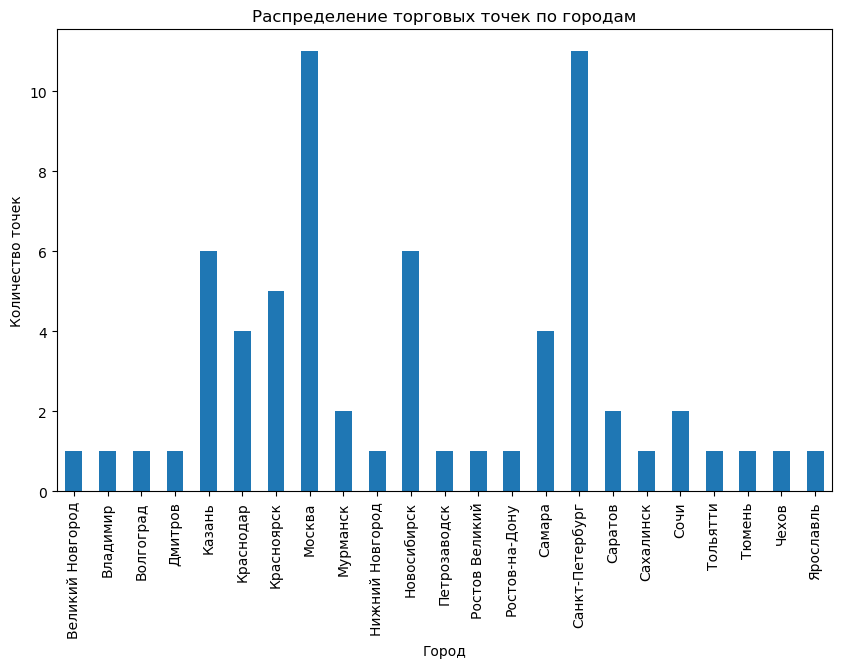

,city,id_trading_point
0,Великий Новгород,1
1,Владимир,1
2,Волгоград,1
3,Дмитров,1
4,Казань,6
5,Краснодар,4
6,Красноярск,5
7,Москва,11
8,Мурманск,2
9,Нижний Новгород,1


In [9]:
import seaborn as sns

df_region_gr = df_main_region.groupby('city').agg({'id_trading_point': 'count'})

plt.figure(figsize=(10, 6))
df_region_gr['id_trading_point'].plot.bar(legend = False)
plt.title("Распределение торговых точек по городам")
plt.xlabel("Город")
plt.ylabel("Количество точек")
plt.show()

df_region_gr = df_region_gr.reset_index()
df_region_gr

In [10]:
df_main_data_gr = df_main_data.groupby('id_client', as_index=False).agg({'amt_payment':'sum'})
df_main_data_gr

,id_client,amt_payment
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178564.0,0.0
4,178565.0,958.0
...,...,...
29707,209630.0,6927.0
29708,209631.0,2090.0
29709,209632.0,2775.0
29710,209633.0,1673.0


In [11]:
df_merged = df_main_clients.merge(df_main_data_gr, on='id_client', how='left')
df_merged.fillna(0,inplace=True)
df_merged_main = df_merged.merge(df_main_region, on='id_trading_point', how='inner')
df_merged_main['is_payed'] = np.where(df_merged_main['amt_payment'] != 0,1,0)
df_merged_main

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,is_payed
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск,1
3,292010,2022-07-26 20:37:16.885,1,212,0.0,Красноярск,0
4,190438,2022-07-02 12:53:04.753,1,212,6026.0,Красноярск,1
...,...,...,...,...,...,...,...
55351,321313,2022-06-17 15:42:47.009,1,1002,0.0,Москва,0
55352,200856,2022-07-28 14:51:08.149,1,1002,6696.0,Москва,1
55353,198305,2022-07-22 06:24:33.232,0,1002,3901.0,Москва,1
55354,201820,2022-07-31 01:25:03.638,0,1002,0.0,Москва,0


In [12]:
def ttest_calc(df2,df1,alpha=0.05):
    
        s, p_value = stats.ttest_ind(df2,df1,alternative='greater')
    
        print('s= ', s)
        print('p_value= ',p_value)

        if p_value < alpha:
            print('Значение метрики больше')
            result = 'not equal'
        else:
            print('Значения метрик равны')
            result = 'equal'
        return result, s, p_value
            
def mann_whitney_func(df1, df2, alpha=0.05):
    statistic, p_value = stats.mannwhitneyu(df1, df2)

    print("Статистика Манна-Уитни:", statistic)
    print("p-value:", p_value)
    
    if p_value < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')

    

In [13]:
list_trading_point_0 = []
list_trading_point_0nogroup = []
df_trading_point = df_merged_main.groupby('id_trading_point',as_index=False).agg({'amt_payment': 'sum'})

df_trading_point_nogr = df_merged_main.groupby(['id_trading_point','nflag_test'], as_index=False).agg({'id_client':'count'})

for row in df_trading_point.itertuples():
    if row.amt_payment == 0:
        list_trading_point_0.append(row.id_trading_point)


for row in df_trading_point_nogr.itertuples():
    if row.id_client == 0:
        list_trading_point_0nogroup.append(row.id_trading_point)

print(list_trading_point_0)
print(list_trading_point_0nogroup)


[1, 4, 7, 13, 23, 26]
[]


In [14]:
df_del = df_merged_main['id_trading_point'].isin(list_trading_point_0)
df_merged_main = df_merged_main[~df_del]
df_merged_main



,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,is_payed
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск,1
3,292010,2022-07-26 20:37:16.885,1,212,0.0,Красноярск,0
4,190438,2022-07-02 12:53:04.753,1,212,6026.0,Красноярск,1
...,...,...,...,...,...,...,...
55351,321313,2022-06-17 15:42:47.009,1,1002,0.0,Москва,0
55352,200856,2022-07-28 14:51:08.149,1,1002,6696.0,Москва,1
55353,198305,2022-07-22 06:24:33.232,0,1002,3901.0,Москва,1
55354,201820,2022-07-31 01:25:03.638,0,1002,0.0,Москва,0


In [15]:
grouped_df = df_merged_main.groupby('nflag_test', as_index=False).agg({'amt_payment':'mean',
                                                                      'is_payed': 'mean',
                                                                      'id_client':'count'})
grouped_df

,nflag_test,amt_payment,is_payed,id_client
0,0,2242.781855,0.511843,29132
1,1,2423.858289,0.538452,25044


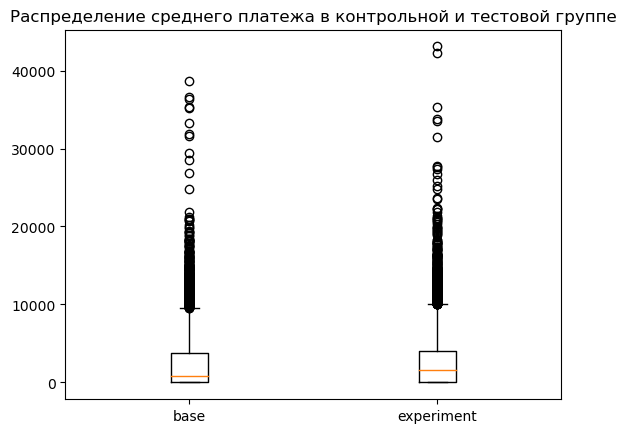

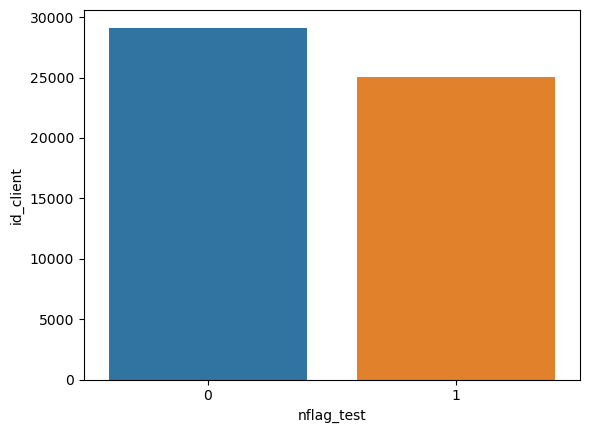

In [16]:
plt.boxplot([df_merged_main[df_merged_main['nflag_test'] == 0]['amt_payment'], \
             df_merged_main[df_merged_main['nflag_test'] == 1]['amt_payment']])
plt.title('Распределение среднего платежа в контрольной и тестовой группе')
plt.xticks([1, 2], ['base', 'experiment'])
plt.show()

sns.barplot(x='nflag_test', y='id_client', data=grouped_df)
plt.show()
# Выбросов нет

In [17]:
result = ttest_calc(df_merged_main[df_merged_main['nflag_test'] == 1]['amt_payment'], \
           df_merged_main[df_merged_main['nflag_test'] == 0]['amt_payment'],alpha=0.05)
if result == 'not equal':
    print('в тестовой группе')

s=  7.151400195391471
p_value=  4.3490129716973624e-13
Значение метрики больше


In [18]:
mann_whitney_func(df_merged_main[df_merged_main['nflag_test'] == 0]['amt_payment'], \
           df_merged_main[df_merged_main['nflag_test'] == 1]['amt_payment'],alpha=0.05)

# Оба теста показали статистически значимое наличие разницы в среднем чеке для всех  сегментов

Статистика Манна-Уитни: 352560771.5
p-value: 9.747523823631458e-13
Распределения не равны


In [19]:
result = ttest_calc(df_merged_main[df_merged_main['nflag_test'] == 1]['is_payed'], \
           df_merged_main[df_merged_main['nflag_test'] == 0]['is_payed'],alpha=0.05)
if result == 'not equal':
    print('в тестовой группе')

s=  6.185222104363054
p_value=  3.122848703326926e-10
Значение метрики больше


In [20]:
mann_whitney_func(df_merged_main[df_merged_main['nflag_test'] == 0]['is_payed'], \
           df_merged_main[df_merged_main['nflag_test'] == 1]['is_payed'],alpha=0.05)

# Оба теста показали статистически значимое наличие разницы в конверсии в покупку


Статистика Манна-Уитни: 355083936.0
p-value: 6.285644384528864e-10
Распределения не равны


In [38]:
city_list = list(df_merged_main['city'].unique())

grouped_df_city = df_merged_main.groupby(['city','nflag_test'], as_index=False).agg({'amt_payment':'mean',
                                                                                      'is_payed': 'mean',
                                                                                      'id_client':'count'})

df_yar = grouped_df_city[grouped_df_city['city'] == 'Ярославль']
# В Ярославле в тестовой группе ни одной покупки, значит тест там не успешен, уберем Ярославль из датафрейма

grouped_df_city = grouped_df_city[grouped_df_city['city'] != 'Ярославль']

city_list.remove('Ярославль')
grouped_df_city

# Использовать будем односторонний ttest, проверять на 'больше' или 'меньше'


,city,nflag_test,amt_payment,is_payed,id_client
0,Владимир,0,2108.610197,0.498355,608
1,Владимир,1,2547.220039,0.550098,509
2,Волгоград,0,2601.761024,0.596017,703
3,Волгоград,1,2288.870624,0.552511,657
4,Дмитров,0,483.450704,0.098592,71
5,Дмитров,1,579.333333,0.115385,78
6,Казань,0,2610.688397,0.474971,2577
7,Казань,1,2733.942000,0.478800,2500
8,Краснодар,0,2581.061510,0.586355,3723
9,Краснодар,1,2696.804688,0.614258,1024


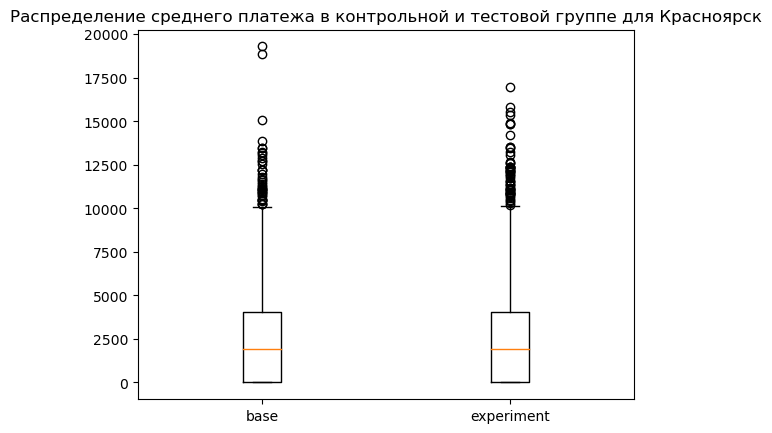

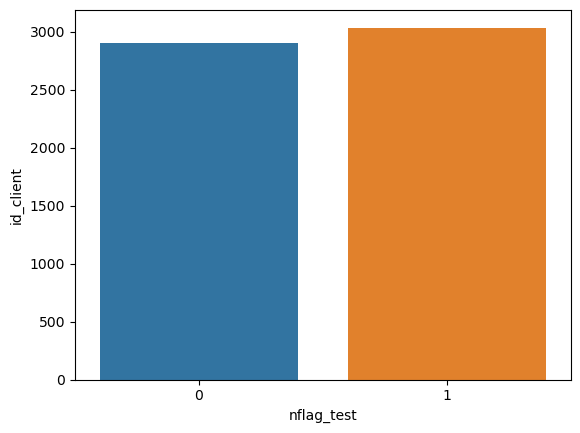

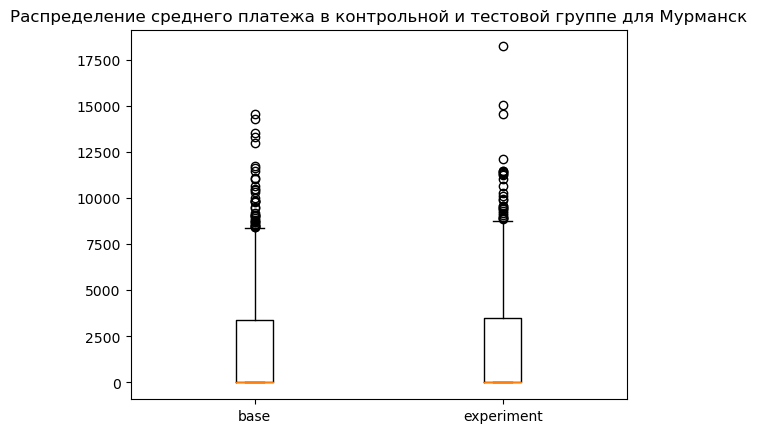

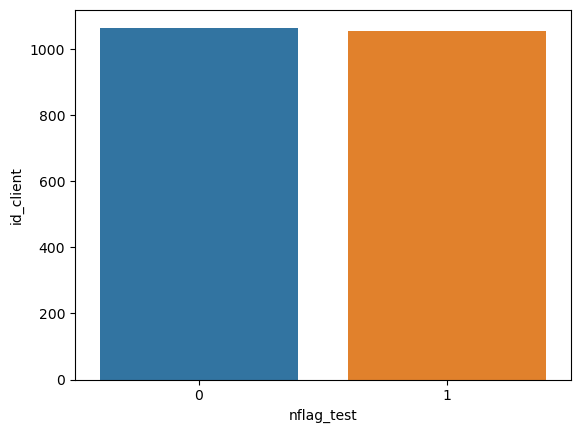

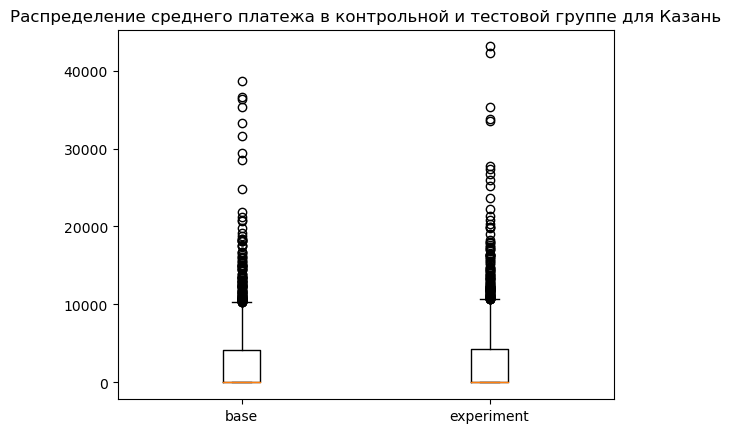

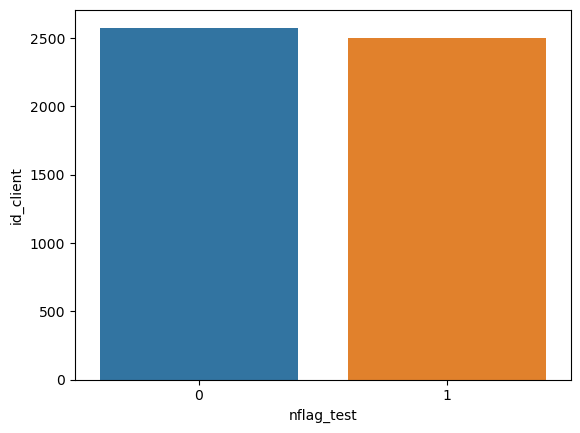

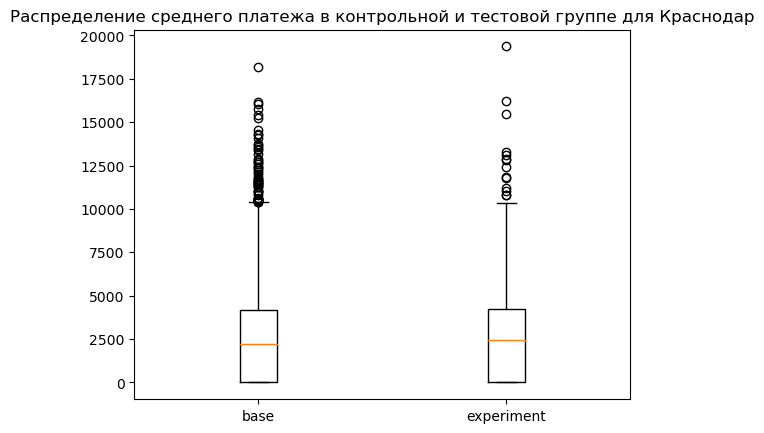

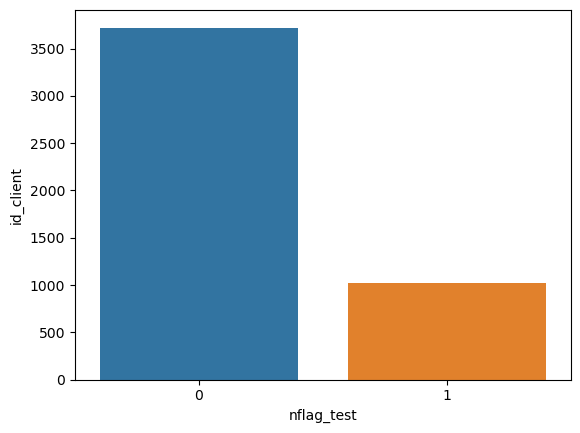

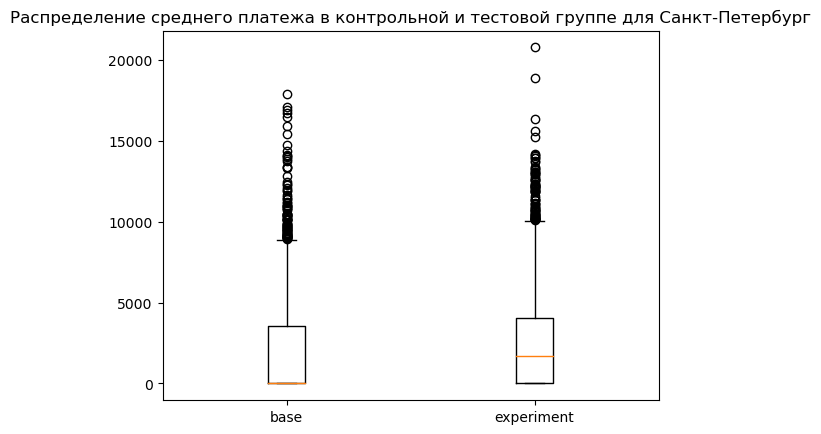

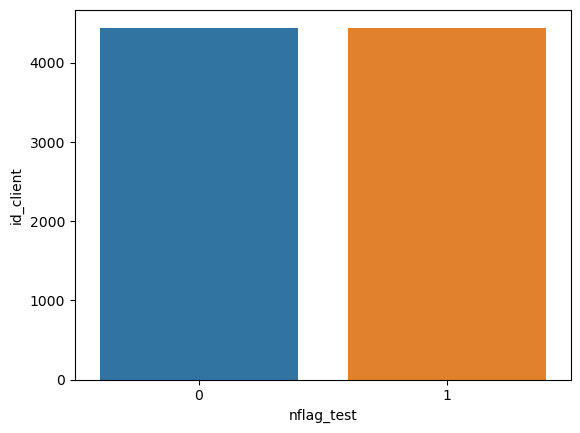

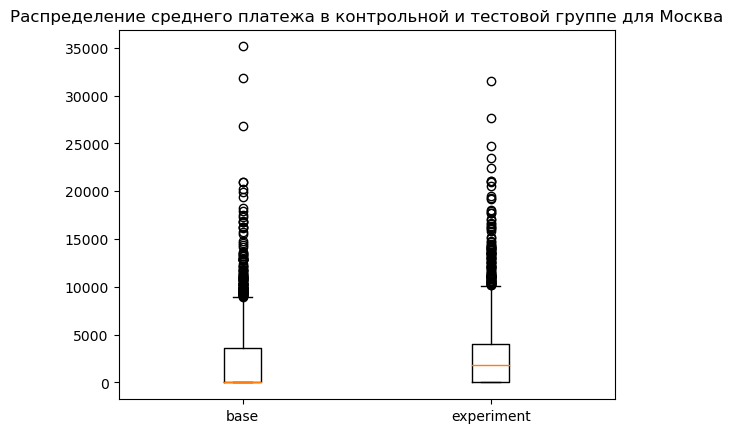

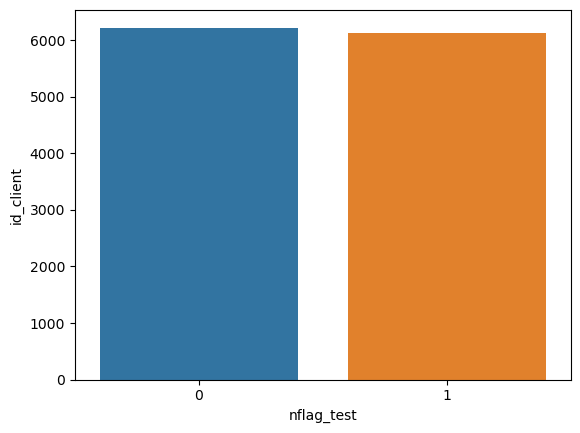

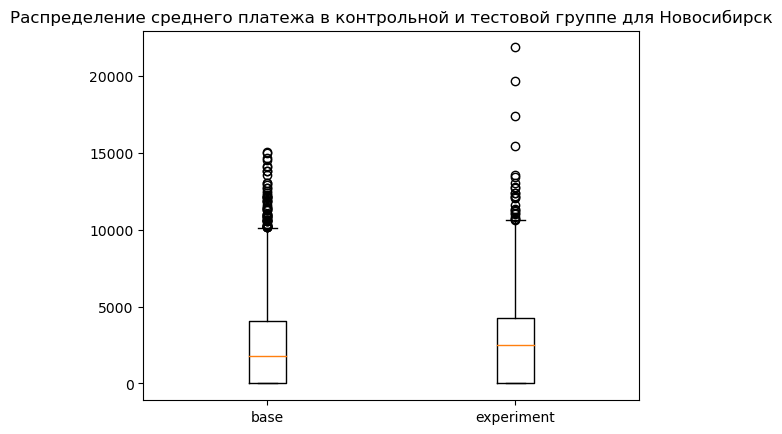

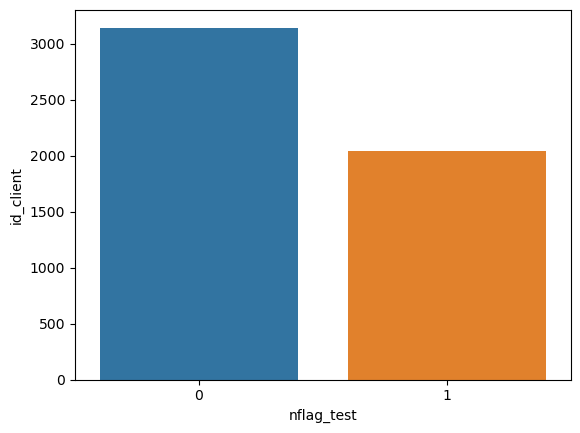

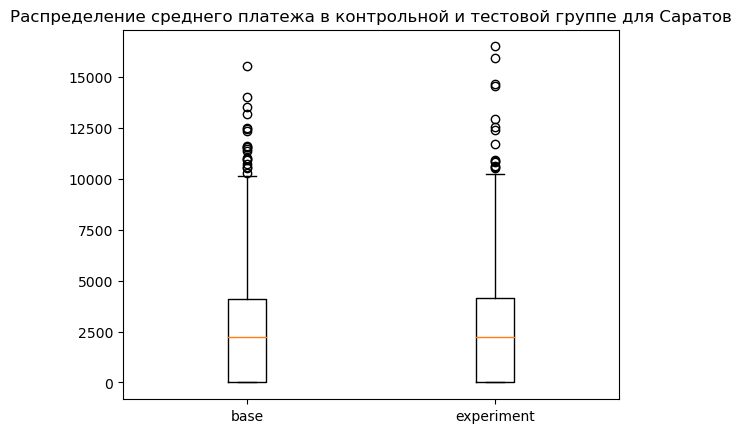

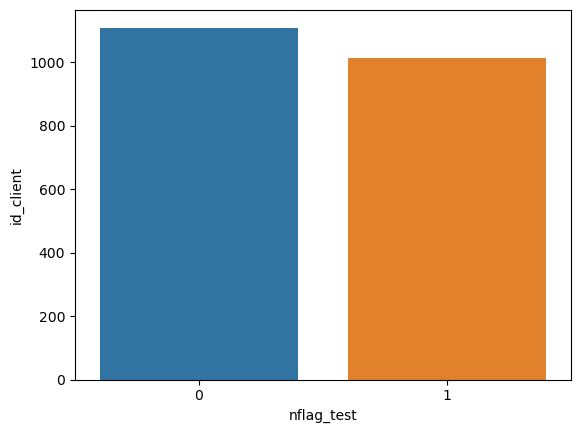

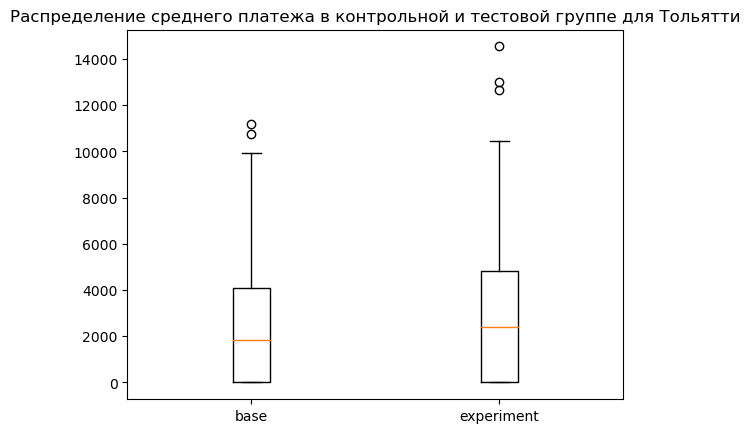

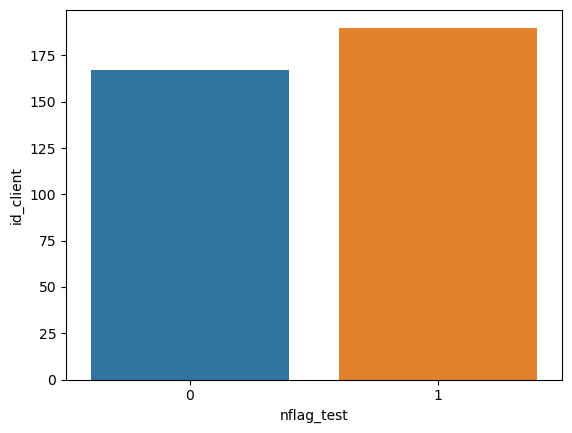

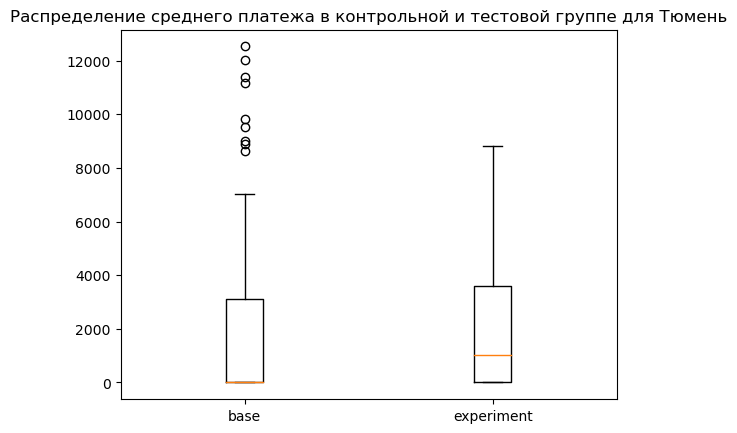

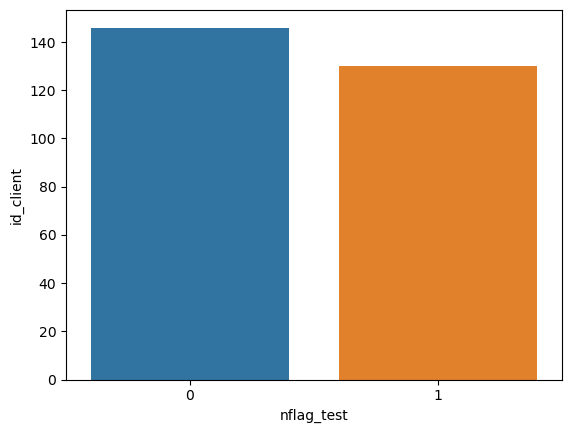

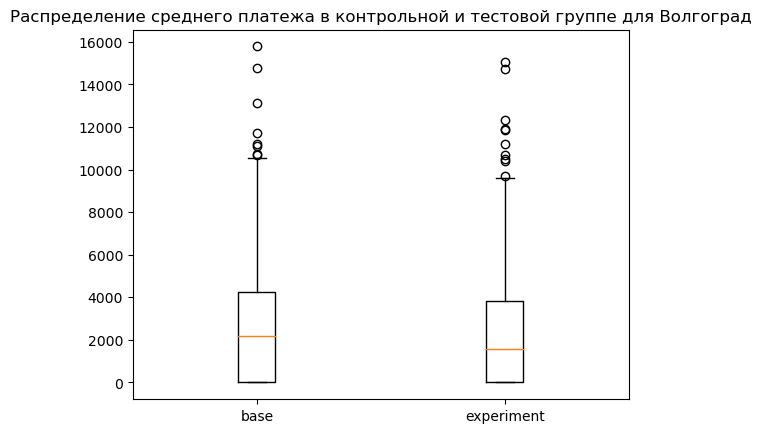

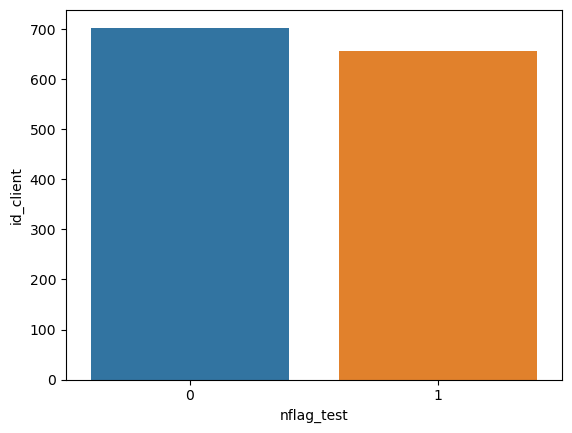

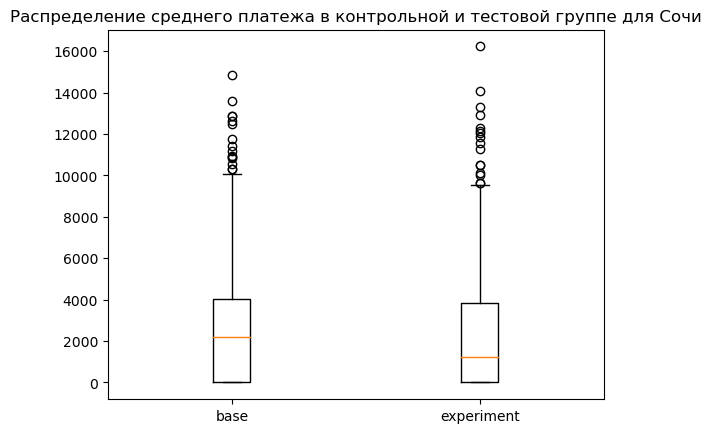

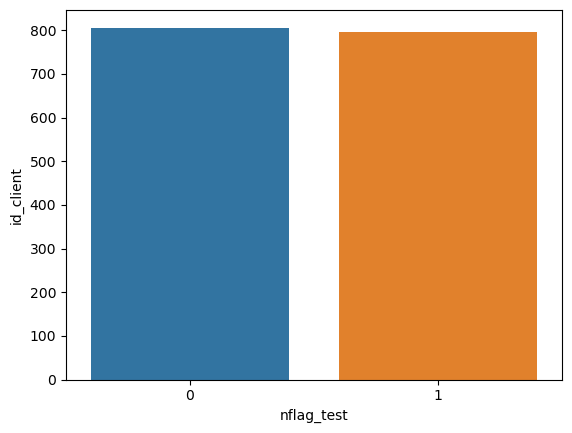

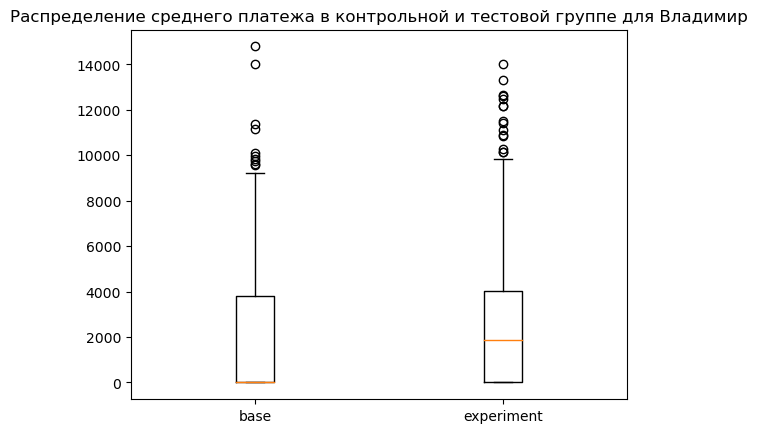

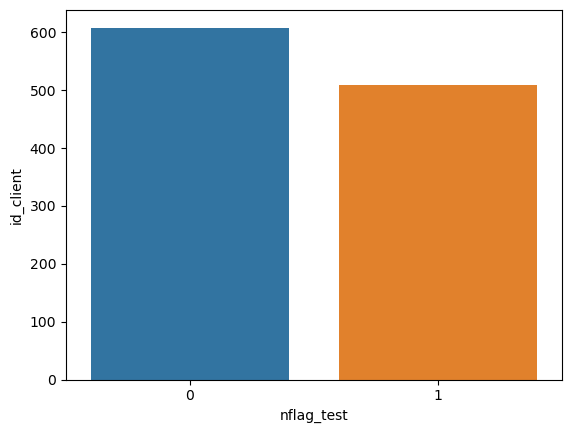

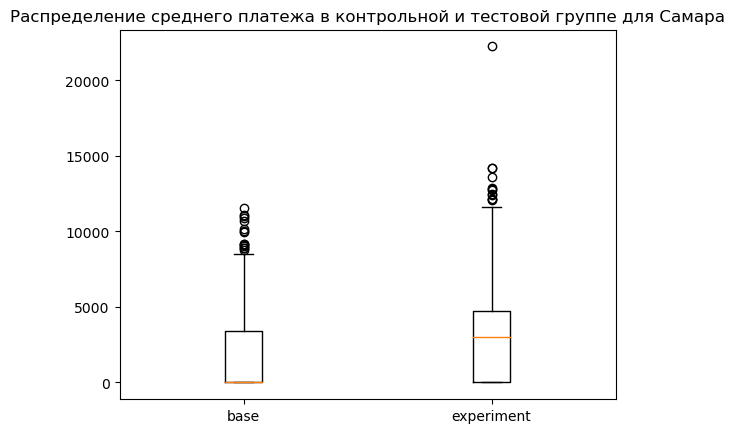

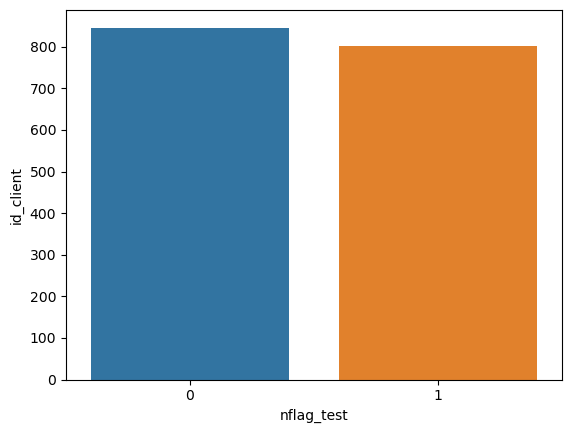

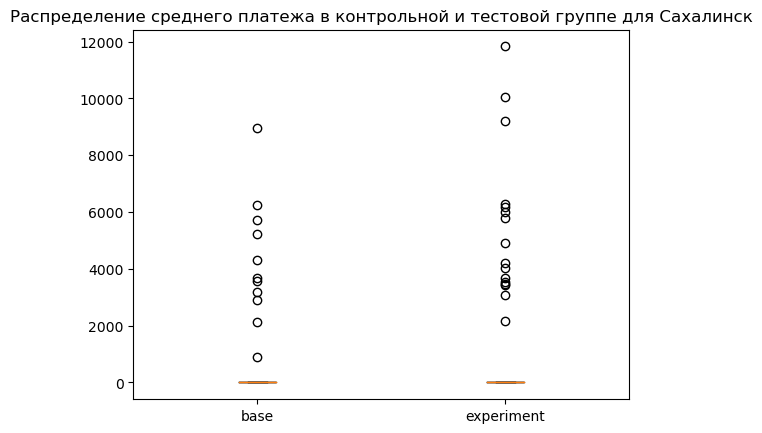

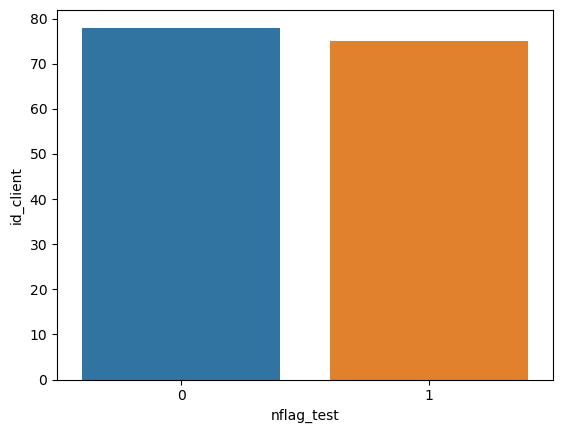

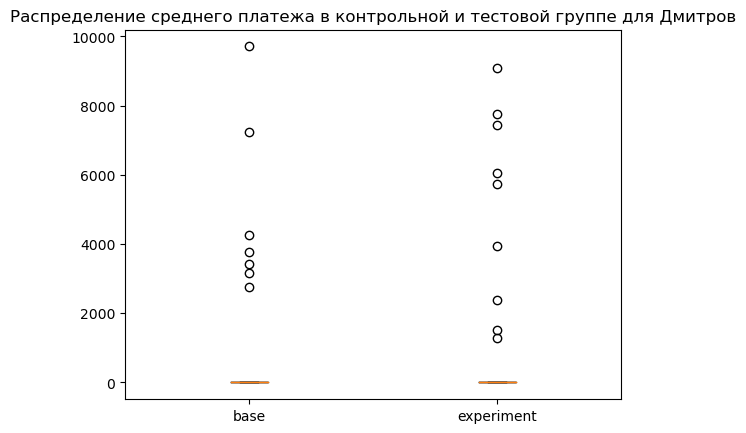

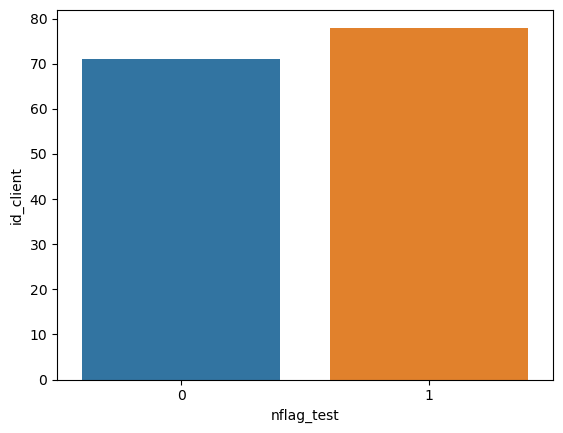

In [22]:
for city in city_list:
    plt.boxplot([df_merged_main[(df_merged_main['city'] == city) & (df_merged_main['nflag_test'] == 0)]['amt_payment'], \
                 df_merged_main[(df_merged_main['city'] == city) & (df_merged_main['nflag_test'] == 1)]['amt_payment']])
    plt.title(f'Распределение среднего платежа в контрольной и тестовой группе для {city}')
    plt.xticks([1, 2], ['base', 'experiment'])
    plt.show()

    sns.barplot(x='nflag_test', y='id_client', data=grouped_df_city[grouped_df_city['city']==city])
    plt.show()
    

In [23]:
# АБ тест по городам для среднего чека

for city in city_list:
    value0 = float(grouped_df_city[(grouped_df_city['city'] == city) & 
                                   (grouped_df_city['nflag_test'] == 0)]['amt_payment'].values)
    value1 = float(grouped_df_city[(grouped_df_city['city'] == city) & 
                                   (grouped_df_city['nflag_test'] == 1)]['amt_payment'].values)
    print(f'Для {city}')
    print()
    if value1 > value0:
        result = ttest_calc(df_merged_main[(df_merged_main['nflag_test'] == 1) &  
                                  (df_merged_main['city'] == city)]['amt_payment'], 
                   df_merged_main[(df_merged_main['nflag_test'] == 0) & 
                                  (df_merged_main['city'] == city)]['amt_payment'],alpha=0.05)
        if result == 'not equal':
            print('в тестовой группе')
    else:
        result = ttest_calc(df_merged_main[(df_merged_main['nflag_test'] == 0) &  
                                  (df_merged_main['city'] == city)]['amt_payment'], 
                   df_merged_main[(df_merged_main['nflag_test'] == 1) & 
                                  (df_merged_main['city'] == city)]['amt_payment'],alpha=0.05)
        if result == 'not equal':
            print('в контрольной группе')
    print()

        
        


Для Красноярск

s=  0.12000608689929208
p_value=  0.45224119406165625
Значения метрик равны

Для Мурманск

s=  0.06902498862889384
p_value=  0.47248812231637827
Значения метрик равны

Для Казань

s=  1.083099881444004
p_value=  0.13940777370247148
Значения метрик равны

Для Краснодар

s=  1.1499685634233776
p_value=  0.12510738685810815
Значения метрик равны

Для Санкт-Петербург

s=  8.759635784179547
p_value=  1.1599044468987081e-18
Значение метрики больше

Для Москва

s=  7.896238614943352
p_value=  1.5583248148153548e-15
Значение метрики больше

Для Новосибирск

s=  3.4631128428326985
p_value=  0.0002691400528102297
Значение метрики больше

Для Саратов

s=  0.10516947629572568
p_value=  0.45812563992745836
Значения метрик равны

Для Тольятти

s=  1.5045563456740754
p_value=  0.0666636623355103
Значения метрик равны

Для Тюмень

s=  0.9264590634677944
p_value=  0.17751138243023784
Значения метрик равны

Для Волгоград

s=  2.0892718943323443
p_value=  0.01843449964049327
Значение метр

In [24]:
# АБ тест по городам для конверсии в покупку

for city in city_list:
    value0 = float(grouped_df_city[(grouped_df_city['city'] == city) & 
                                   (grouped_df_city['nflag_test'] == 0)]['is_payed'].values)
    value1 = float(grouped_df_city[(grouped_df_city['city'] == city) & 
                                   (grouped_df_city['nflag_test'] == 1)]['is_payed'].values)
    print(f'Для {city}')
    print()
    if value1 > value0:
        result = ttest_calc(df_merged_main[(df_merged_main['nflag_test'] == 1) &  
                                  (df_merged_main['city'] == city)]['is_payed'], 
                   df_merged_main[(df_merged_main['nflag_test'] == 0) & 
                                  (df_merged_main['city'] == city)]['is_payed'],alpha=0.05)
        if result == 'not equal':
            print('в тестовой группе')
    else:
        result = ttest_calc(df_merged_main[(df_merged_main['nflag_test'] == 0) &  
                                  (df_merged_main['city'] == city)]['is_payed'], 
                   df_merged_main[(df_merged_main['nflag_test'] == 1) & 
                                  (df_merged_main['city'] == city)]['is_payed'],alpha=0.05)
        if result == 'not equal':
            print('в контрольной группе')
    print()

Для Красноярск

s=  0.27863631219717744
p_value=  0.39026682507150534
Значения метрик равны

Для Мурманск

s=  0.8460108060373052
p_value=  0.1988211423233216
Значения метрик равны

Для Казань

s=  0.27304492857426443
p_value=  0.3924148945127865
Значения метрик равны

Для Краснодар

s=  1.6092796778407137
p_value=  0.05381086155951075
Значения метрик равны

Для Санкт-Петербург

s=  9.352468686561785
p_value=  5.329128299598365e-21
Значение метрики больше

Для Москва

s=  6.427576036124008
p_value=  6.721104361188598e-11
Значение метрики больше

Для Новосибирск

s=  5.02392485077741
p_value=  2.6162340179668847e-07
Значение метрики больше

Для Саратов

s=  0.6507850002388367
p_value=  0.25762790456412016
Значения метрик равны

Для Тольятти

s=  1.185144360467606
p_value=  0.1183765589989277
Значения метрик равны

Для Тюмень

s=  2.4598250966325907
p_value=  0.007259129661066645
Значение метрики больше

Для Волгоград

s=  1.6222173039489063
p_value=  0.05249447248629148
Значения метрик 

In [42]:
## АБ тест по городам и торговым точкам по платежам

df_grouped_city_point = df_merged_main.groupby(['city','id_trading_point','nflag_test'], as_index=False) \
                                      .agg({'amt_payment':['mean','std'], 
                                            'is_payed':'mean', 
                                            'id_client':'count',
                                            })

df_yar_46 = df_grouped_city_point[df_grouped_city_point['city'] == 'Ярославль']
# Уберем из датафрейма ярославль и 46 точку
df_grouped_city_point = df_grouped_city_point[df_grouped_city_point['city'] != 'Ярославль']
# df_grouped_city_point = df_grouped_city_point[df_grouped_city_point['id_trading_point'].value_counts()>1]
# Создадим датафрейм с торговыми точками, для которых существует только тестовая или только контрольная группа
# И создадим итоговый датафрейм для АБ теста

point_counts = df_grouped_city_point['id_trading_point'].value_counts()
remove = list(point_counts[point_counts<2].index)

df_grouped_city_point_problem = df_grouped_city_point[df_grouped_city_point['id_trading_point'].isin(remove)]

df_grouped_city_point = df_grouped_city_point[~df_grouped_city_point['id_trading_point'].isin(remove)]

# df_grouped_city_point_problem
df_grouped_city_point

city id_trading_point nflag_test  amt_payment               \
                                                   mean          std   
0     Владимир               11          0  2108.610197  2663.038392   
1     Владимир               11          1  2547.220039  3023.702164   
2    Волгоград               66          0  2601.761024  2830.193773   
3    Волгоград               66          1  2288.870624  2682.567610   
4      Дмитров                2          0   483.450704  1654.923182   
..         ...              ...        ...          ...          ...   
105       Сочи               73          1  2092.181818  2530.274648   
106   Тольятти               88          0  2439.461078  2689.343053   
107   Тольятти               88          1  2902.410526  3074.648887   
108     Тюмень               19          0  1743.376712  2891.333359   
109     Тюмень               19          1  2043.823077  2442.266788   

     is_payed id_client  
         mean     count  
0    0.498355       608  
1    0.550098       509  
2    0.596017       703  
3    0.552511       657  
4    0.098592        71  
..        ...       ...  
105  0.508021       187  
106  0.580838       167  
107  0.642105       190  
108  0.376712       146  
109  0.523077       130  

[102 rows x 7 columns]

In [26]:
final_df = df_grouped_city_point.copy()

final_df['count_test'] = final_df[final_df['nflag_test']==1]['id_client']
final_df = final_df.fillna(method='bfill')

final_df['count_control'] = final_df[final_df['nflag_test']==0]['id_client']
final_df = final_df.fillna(method='ffill')

final_df['avg_payment_test'] = final_df[final_df['nflag_test']==1]['amt_payment']['mean']
final_df = final_df.fillna(method='bfill')

final_df['avg_payment_control'] = final_df[final_df['nflag_test']==0]['amt_payment']['mean']
final_df = final_df.fillna(method='ffill')

final_df['sigma_test'] = final_df[final_df['nflag_test']==1]['amt_payment']['std']
final_df = final_df.fillna(method='bfill')

final_df['sigma_control'] = final_df[final_df['nflag_test']==0]['amt_payment']['std']
final_df = final_df.fillna(method='ffill')
final_df.drop(['nflag_test','amt_payment','is_payed','id_client'], axis=1, level=0, inplace=True)
# final_df.dropna(inplace=True)
final_df.drop_duplicates(inplace=True)
final_df['count_all'] = final_df['count_test'] + final_df['count_control']
final_df['percent_count'] = final_df['count_all'] / final_df['count_all'].sum() * 100
final_df['diff'] = final_df['avg_payment_test'] - final_df['avg_payment_control']

final_df = final_df[['city','id_trading_point', 'count_test','count_control','count_all','percent_count', \
                     'avg_payment_test','avg_payment_control','diff','sigma_test','sigma_control']]
final_df.columns = [''.join(col).strip() for col in final_df.columns.values]
df_grouped_city_point.columns =  [''.join(col).strip() for col in df_grouped_city_point.columns.values]
final_df


,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control
0,Владимир,11,509.0,608.0,1117.0,2.464804,2547.220039,2108.610197,438.609842,3023.702164,2663.038392
2,Волгоград,66,657.0,703.0,1360.0,3.001015,2288.870624,2601.761024,-312.890400,2682.567610,2830.193773
4,Дмитров,2,78.0,71.0,149.0,0.328788,579.333333,483.450704,95.882629,1860.762430,1654.923182
6,Казань,439,355.0,351.0,706.0,1.557880,2481.960563,2400.635328,81.325236,4040.441007,3722.117072
8,Казань,477,382.0,386.0,768.0,1.694691,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719
10,Казань,516,634.0,636.0,1270.0,2.802418,3245.200315,2880.484277,364.716039,4543.169262,3819.292813
12,Казань,544,377.0,416.0,793.0,1.749857,2621.427056,2635.548077,-14.121021,3714.894751,4639.820746
14,Казань,699,482.0,494.0,976.0,2.153670,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356
16,Казань,991,270.0,294.0,564.0,1.244539,3249.281481,2452.986395,796.295087,4719.592601,3633.935858
20,Краснодар,1101,785.0,869.0,1654.0,3.649764,2176.003822,2523.578826,-347.575005,2722.624494,2960.352338


In [27]:
df_ab_results = pd.DataFrame(columns = ['city','id_trading_point','ttest','pvalue_ttest','flag'])



dict_points = {}


for row in df_grouped_city_point.itertuples():
    dict_points[row.city] = set()
for row in df_grouped_city_point.itertuples():
    dict_points[row.city].add(row.id_trading_point)

dict_points


for city, points in dict_points.items():
    for point in points:
        flag = ''
        value0 = float(df_grouped_city_point[(df_grouped_city_point['id_trading_point'] == point) &
                                             (df_grouped_city_point['city'] == city) &
                                             (df_grouped_city_point['nflag_test'] == 0)]['amt_paymentmean'].values)
        value1 = float(df_grouped_city_point[(df_grouped_city_point['id_trading_point'] == point) &
                                       (df_grouped_city_point['city'] == city) &
                                       (df_grouped_city_point['nflag_test'] == 1)]['amt_paymentmean'].values)
        print(f'Для торговой точки {point} города {city}')
        print()
        if value1 > value0:
            result = ttest_calc(df_merged_main[(df_merged_main['nflag_test'] == 1) & 
                                               (df_merged_main['city'] == city) &
                                                   (df_merged_main['id_trading_point'] == point)]['amt_payment'], 
                        df_merged_main[(df_merged_main['nflag_test'] == 0) & 
                                       (df_merged_main['city'] == city) &
                                          (df_merged_main['id_trading_point'] == point)]['amt_payment'],alpha=0.05)
            if result[0] == 'not equal':
                print('в тестовой группе')
                flag = 'positive'
            else:
                flag = 'neutral'
                
                
        else:
            result = ttest_calc(df_merged_main[(df_merged_main['nflag_test'] == 0) & 
                                               (df_merged_main['city'] == city) &
                                                   (df_merged_main['id_trading_point'] == point)]['amt_payment'], 
                        df_merged_main[(df_merged_main['nflag_test'] == 1) & 
                                       (df_merged_main['city'] == city) &
                                          (df_merged_main['id_trading_point'] == point)]['amt_payment'],alpha=0.05)
            if result[0] == 'not equal':
                print('в контрольной группе')
                flag = 'negative'
            else:
                flag = 'neutral'
            
        print()
        
        df_ab_results = df_ab_results.append({'city': city,
                                              'id_trading_point': point,
                                              'ttest': result[1],
                                              'pvalue_ttest': result[2],
                                              'flag': flag},ignore_index=True)
        
        


Для торговой точки 11 города Владимир

s=  2.5769554932923184
p_value=  0.005047556085175856
Значение метрики больше
в тестовой группе

Для торговой точки 66 города Волгоград

s=  2.0892718943323443
p_value=  0.01843449964049327
Значение метрики больше
в контрольной группе

Для торговой точки 2 города Дмитров

s=  0.3310524347645207
p_value=  0.3705381562900823
Значения метрик равны

Для торговой точки 544 города Казань

s=  0.0469970597577382
p_value=  0.48126371681330027
Значения метрик равны

Для торговой точки 516 города Казань

s=  1.5486734367114747
p_value=  0.0608548888834405
Значения метрик равны

Для торговой точки 439 города Казань

s=  0.2780673503780506
p_value=  0.390521151770714
Значения метрик равны

Для торговой точки 699 города Казань

s=  0.594253825884729
p_value=  0.2762401779407264
Значения метрик равны

Для торговой точки 477 города Казань

s=  0.8915933629198624
p_value=  0.18644545179593286
Значения метрик равны

Для торговой точки 991 города Казань



C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

s=  2.2552583978062275
p_value=  0.012250502445135883
Значение метрики больше
в тестовой группе

Для торговой точки 1989 города Краснодар

s=  1.0499935308392907
p_value=  0.14711065824029523
Значения метрик равны

Для торговой точки 1101 города Краснодар

s=  2.4767363085304246
p_value=  0.006679223809459098
Значение метрики больше
в контрольной группе

Для торговой точки 202 города Красноярск

s=  1.155072918440385
p_value=  0.12415413195223568
Значения метрик равны

Для торговой точки 212 города Красноярск

s=  0.4835853855099397
p_value=  0.3143854738202708
Значения метрик равны

Для торговой точки 277 города Красноярск

s=  0.9817054668531612
p_value=  0.1632063948896656
Значения метрик равны

Для торговой точки 278 города Красноярск

s=  1.8202681201948652
p_value=  0.03450528037291751
Значение метрики больше
в тестовой группе

Для торговой точки 444 города Красноярск

s=  0.8767403719314057
p_value=  0.1904008500514212
Значения метрик равны

Для торговой точки 9121 города Москва

C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

s=  4.221009921584547
p_value=  1.3705525103042188e-05
Значение метрики больше
в тестовой группе

Для торговой точки 1002 города Москва

s=  6.3534483983808006
p_value=  3.564979251511684e-10
Значение метрики больше
в тестовой группе

Для торговой точки 3786 города Москва

s=  0.1918852001092001
p_value=  0.42395402942593946
Значения метрик равны

Для торговой точки 9931 города Москва

s=  2.1191969117156004
p_value=  0.017464734499475908
Значение метрики больше
в контрольной группе

Для торговой точки 6543 города Москва

s=  1.4343982796457264
p_value=  0.07584520231477303
Значения метрик равны

Для торговой точки 3987 города Москва

s=  0.2819652008786738
p_value=  0.38900351368016317
Значения метрик равны

Для торговой точки 1654 города Москва

s=  4.299797768153404
p_value=  9.073300296754786e-06
Значение метрики больше
в тестовой группе

Для торговой точки 2652 города Москва

s=  6.74513707501449
p_value=  8.581004763976455e-12
Значение метрики больше
в тестовой группе

Для торгов

C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

s=  0.011267745874345342
p_value=  0.49550624470602034
Значения метрик равны

Для торговой точки 33 города Самара

s=  9.53283791641104
p_value=  3.611259487285726e-20
Значение метрики больше
в тестовой группе

Для торговой точки 34 города Самара

s=  5.386264996928272
p_value=  5.6638925651941534e-08
Значение метрики больше
в тестовой группе

Для торговой точки 35 города Самара

s=  4.806666195414569
p_value=  1.0823378379294053e-06
Значение метрики больше
в тестовой группе

Для торговой точки 36 города Самара

s=  4.027950727966892
p_value=  3.6593790454966896e-05
Значение метрики больше
в тестовой группе

Для торговой точки 576 города Санкт-Петербург

s=  1.7740729896541767
p_value=  0.03814391687906792
Значение метрики больше
в тестовой группе

Для торговой точки 801 города Санкт-Петербург

s=  2.0999906224732117
p_value=  0.018152503032759528
Значение метрики больше
в тестовой группе

Для торговой точки 900 города Санкт-Петербург

s=  3.6869135728897025
p_value=  0.000122626711961

C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

s=  0.8368253919110503
p_value=  0.20187942337553688
Значения метрик равны

Для торговой точки 112 города Санкт-Петербург

s=  1.7707120159517762
p_value=  0.03841855151876277
Значение метрики больше
в тестовой группе

Для торговой точки 213 города Санкт-Петербург

s=  2.750751894358415
p_value=  0.003084107647505232
Значение метрики больше
в тестовой группе

Для торговой точки 309 города Санкт-Петербург

s=  1.2284546135977674
p_value=  0.10994169208359253
Значения метрик равны

Для торговой точки 117 города Санкт-Петербург

s=  3.3981956005701757
p_value=  0.00035019083156714176
Значение метрики больше
в тестовой группе

Для торговой точки 891 города Санкт-Петербург

s=  2.1355934806765244
p_value=  0.016731018422345974
Значение метрики больше
в тестовой группе

Для торговой точки 573 города Санкт-Петербург

s=  4.0165685114334515
p_value=  3.647037059615355e-05
Значение метрики больше
в тестовой группе

Для торговой точки 80 города Саратов

s=  0.03955808646720596
p_value=  0.484225

C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

s=  1.6270604929283117
p_value=  0.05290460627463651
Значения метрик равны

Для торговой точки 72 города Сочи

s=  0.9412336353575678
p_value=  0.17338379260206055
Значения метрик равны

Для торговой точки 73 города Сочи

s=  1.4958446791905915
p_value=  0.06779507345309216
Значения метрик равны

Для торговой точки 88 города Тольятти

s=  1.5045563456740754
p_value=  0.0666636623355103
Значения метрик равны

Для торговой точки 19 города Тюмень

s=  0.9264590634677944
p_value=  0.17751138243023784
Значения метрик равны



C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ab_results = df_ab_results.append({'city': city,
C:\Users\Aleksei Samokhin\AppData\Local\Temp\ipykernel_10408\367014954.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [29]:
final_merged_df = final_df.merge(df_ab_results, on=('city','id_trading_point'), how='inner')
final_merged_df

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag
0,Владимир,11,509.0,608.0,1117.0,2.464804,2547.220039,2108.610197,438.609842,3023.702164,2663.038392,2.576955,5.047556e-03,positive
1,Волгоград,66,657.0,703.0,1360.0,3.001015,2288.870624,2601.761024,-312.890400,2682.567610,2830.193773,2.089272,1.843450e-02,negative
2,Дмитров,2,78.0,71.0,149.0,0.328788,579.333333,483.450704,95.882629,1860.762430,1654.923182,0.331052,3.705382e-01,neutral
3,Казань,439,355.0,351.0,706.0,1.557880,2481.960563,2400.635328,81.325236,4040.441007,3722.117072,0.278067,3.905212e-01,neutral
4,Казань,477,382.0,386.0,768.0,1.694691,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,0.891593,1.864455e-01,neutral
5,Казань,516,634.0,636.0,1270.0,2.802418,3245.200315,2880.484277,364.716039,4543.169262,3819.292813,1.548673,6.085489e-02,neutral
6,Казань,544,377.0,416.0,793.0,1.749857,2621.427056,2635.548077,-14.121021,3714.894751,4639.820746,0.046997,4.812637e-01,neutral
7,Казань,699,482.0,494.0,976.0,2.153670,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,0.594254,2.762402e-01,neutral
8,Казань,991,270.0,294.0,564.0,1.244539,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,1.225050e-02,positive
9,Краснодар,1101,785.0,869.0,1654.0,3.649764,2176.003822,2523.578826,-347.575005,2722.624494,2960.352338,2.476736,6.679224e-03,negative


In [30]:
df_positive = final_merged_df.copy() 
df_positive = df_positive[df_positive['flag']=='positive']
df_positive.drop('flag', axis=1,inplace=True)

df_negative = final_merged_df.copy() 
df_negative = df_negative[df_negative['flag']=='negative']
df_negative.drop('flag', axis=1,inplace=True)

df_neutral = final_merged_df.copy() 
df_neutral = df_neutral[df_neutral['flag']=='neutral']
df_neutral.drop('flag', axis=1,inplace=True)

In [533]:
pip install XlsxWriter

In [47]:
import openpyxl
writer = pd.ExcelWriter("C:\Aleksei\DataAnalisys\Diploma\AB_results.xlsx", engine="xlsxwriter")

problem_df = pd.concat([df_grouped_city_point_problem,df_yar_46],axis=0)

df_positive.to_excel(writer, sheet_name="Positive", index=False)
df_negative.to_excel(writer, sheet_name="Negative", index=False)
df_neutral.to_excel(writer, sheet_name="Neutral", index=False)
problem_df.to_excel(writer, sheet_name="Проблемные точки")

writer.close()
    